In [215]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [216]:
df=pd.read_excel("amazon.xlsx")

In [217]:
df.head()

,Star,HelpFul,Title,Review
0,5,0,looks great,Happy with it
1,5,0,Pattern did not align between the two panels.,Good quality material however the panels are m...
2,5,0,Imagery is stretched. Still fun.,Product was fun for bedroom windows.<br />Imag...
3,5,0,Que se ven elegantes muy finas,Lo unico que me gustaria es que sean un poco ...
4,5,0,Wow great purchase,Great bang for the buck I can't believe the qu...


### Ön İşleme

#### Yorumları küçük hale çevirdik

In [218]:
df["Review"]=df["Review"].str.lower()

In [219]:
df["Review"][0:5]

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows.<br />imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can't believe the qu...
Name: Review, dtype: object

#### Nok. işaretlerini çıkaralım

In [220]:
df["Review"]=df["Review"].str.replace(r'[^\w\s]',' ',regex=True)

In [221]:
df["Review"][0:5]

0                                        happy with it
1    good quality material however the panels are m...
2    product was fun for bedroom windows  br   imag...
3     lo unico que me gustaria es que sean un poco ...
4    great bang for the buck i can t believe the qu...
Name: Review, dtype: object

#### Sayıları çıkaralım

In [222]:
df["Review"]=df["Review"].str.replace('[\d]',' ',regex=True)

### StopWordsleri çıkaralım

In [223]:
import nltk
nltk.download("stopwords")
from nltk.corpus import  stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iremu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [224]:
sw=stopwords.words("english")

In [225]:
df["Review"]=df["Review"].apply(lambda x :" ".join(x for x in str(x).split() if x not in sw)) 

In [226]:
df["Review"].head(2)

0                                               happy
1    good quality material however panels mis matched
Name: Review, dtype: object

#### 1000'den az geçen kelimeleri veriden çıkarıyoruz

In [227]:
pd.Series(' '.join(df["Review"]).split()).value_counts()

curtains     1919
love         1334
room         1142
like         1050
beautiful     965
             ... 
encantan        1
seamed          1
accessing       1
shined          1
sms             1
Name: count, Length: 5804, dtype: int64

In [228]:
pd.Series(' '.join(df["Review"]).split()).value_counts()[-1000:]

thumbnail    1
edit         1
torch        1
burnt        1
runway       1
            ..
encantan     1
seamed       1
accessing    1
shined       1
sms          1
Name: count, Length: 1000, dtype: int64

In [229]:
temp_df=pd.Series(' '.join(df["Review"]).split()).value_counts()[-1000:]

In [230]:
df["Review"]=df["Review"].apply(lambda x :" ".join(x for x in x.split() if x not in temp_df))

In [231]:
df["Review"].head(15)

0                                                 happy
1      good quality material however panels mis matched
2     product fun bedroom windows br imagery bit str...
3     lo unico que gustaria es que sean un poco mas ...
4     great bang buck believe quality material vibra...
5                                 looks different photo
6     exactly looking heavy material great price shi...
7     looking picture thought curtains would thinner...
8     much whiter thought would really expecting wan...
9     curtains picture shows rd set ambesonne curtai...
10    blocks views living room front door kitchen di...
11                       private closed darkening point
12                                          block light
13    work fine night curtains sheer daytime labeled...
14                                                     
Name: Review, dtype: object

### Lemmatization

In [232]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iremu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [233]:
df["Review"]=df["Review"].apply(lambda x :" ".join([Word(word).lemmatize() for word in x.split()]))

### Metin Görselleştirme

In [ ]:
tf=df["Review"].apply(lambda x : pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [235]:
tf.head(3)

,index,0
0,happy,203.0
1,good,542.0
2,quality,904.0


In [236]:
tf.columns=["words","tf"]

In [237]:
tf.head(3)

,words,tf
0,happy,203.0
1,good,542.0
2,quality,904.0


In [238]:
import matplotlib.pyplot as plt

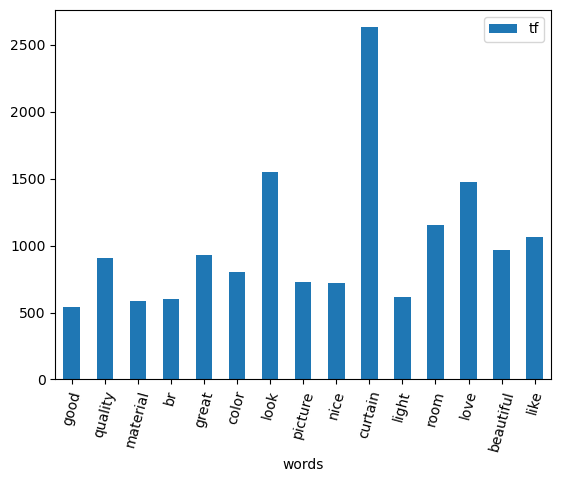

In [239]:
tf[tf["tf"]>500].plot.bar(x="words",y="tf")
plt.xticks(rotation=75)
plt.show()

### Word Cloud

In [240]:
text=" ".join(i for i in df.Review)

In [241]:
from wordcloud import WordCloud
wordCloud=WordCloud().generate(text)

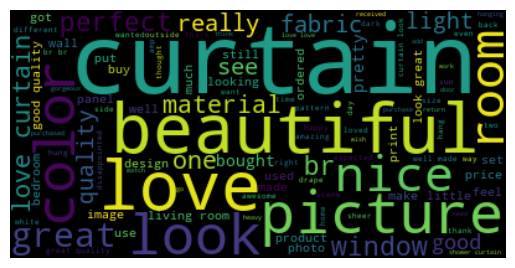

In [242]:
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Sentiment Analysis

In [243]:
df.head(10)

,Star,HelpFul,Title,Review
0,5,0,looks great,happy
1,5,0,Pattern did not align between the two panels.,good quality material however panel mi matched
2,5,0,Imagery is stretched. Still fun.,product fun bedroom window br imagery bit stre...
3,5,0,Que se ven elegantes muy finas,lo unico que gustaria e que sean un poco ma la...
4,5,0,Wow great purchase,great bang buck believe quality material vibra...
5,5,0,Not for us,look different photo
6,5,0,Perfect for spa room,exactly looking heavy material great price shi...
7,5,0,Actually better than expected,looking picture thought curtain would thinner ...
8,4,0,Not what expected,much whiter thought would really expecting wan...
9,5,0,Pretty as a Picture,curtain picture show rd set ambesonne curtain ...


In [244]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [245]:
sia=SentimentIntensityAnalyzer()

In [246]:
sia.polarity_scores("curtain")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

#### Review değişkeninin ilk 10 gözlemi için polarity_scores() 

In [247]:
review_10=df["Review"].head(10)

In [248]:
review_10.apply(lambda x :sia.polarity_scores(x))

0    {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...
1    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
2    {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'comp...
5    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
6    {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'comp...
7    {'neg': 0.0, 'neu': 0.578, 'pos': 0.422, 'comp...
8    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
9    {'neg': 0.0, 'neu': 0.772, 'pos': 0.228, 'comp...
Name: Review, dtype: object

In [249]:
review_10.apply(lambda x :sia.polarity_scores(x)["compound"])

0    0.5719
1    0.4404
2    0.8519
3    0.0000
4    0.9042
5    0.0000
6    0.6249
7    0.9080
8    0.0000
9    0.7096
Name: Review, dtype: float64

In [250]:
review_10.apply(lambda x :"pos" if  sia.polarity_scores(x)["compound"] >0  else "neg")

0    pos
1    pos
2    pos
3    neg
4    pos
5    neg
6    pos
7    pos
8    neg
9    pos
Name: Review, dtype: object

### 0.50'den büyükse pos,değilse neg

In [251]:
df["polarity_score"]=df["Review"].apply(lambda x : "pos" if sia.polarity_scores(x)["compound"]>0.50 else "neg")       

In [252]:
df["polarity_score"].value_counts()

polarity_score
pos    3980
neg    1631
Name: count, dtype: int64

In [253]:
#df["polarity_score"]=LabelEncoder().fit_transform(df["polarity_score"])

#### Bağımlı - Bağımsız Değişkenler

In [254]:
y=df["polarity_score"]
X=df["Review"]

In [255]:
from sklearn.model_selection import train_test_split

In [256]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### TF-IDF

In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [258]:
tf_idf_word_vectorizer=TfidfVectorizer()

In [259]:
tf_idf_word_vectorizer.fit(X_train)

TfidfVectorizer()

In [265]:
X_train_tf_idf_word=tf_idf_word_vectorizer.transform(X_train)

In [266]:
X_test_tf_idf_word=tf_idf_word_vectorizer.transform(X_test)

### Logistic Regresyon

In [267]:
log_model=LogisticRegression().fit(X_train_tf_idf_word,y_train)

In [268]:
y_pred=log_model.predict(X_test_tf_idf_word)

In [271]:
from sklearn.metrics import classification_report


In [273]:
classification_report(y_pred,y_test)

              precision    recall  f1-score   support

         neg       0.77      0.86      0.81       304
         pos       0.94      0.91      0.92       819

    accuracy                           0.89      1123
   macro avg       0.86      0.88      0.87      1123
weighted avg       0.90      0.89      0.89      1123



In [274]:
cross_val_score(log_model,
                X_test_tf_idf_word,
                y_test,scoring="accuracy",
                cv=5).mean()


0.7996587301587302

In [289]:
rf_model=RandomForestClassifier().fit(X_train_tf_idf_word,y_train)

In [290]:
cross_val_score(rf_model,X_test_tf_idf_word,y_test,cv=5,n_jobs=-1).mean()

0.8611230158730159